Silhouette Score: 0.34571775074615874


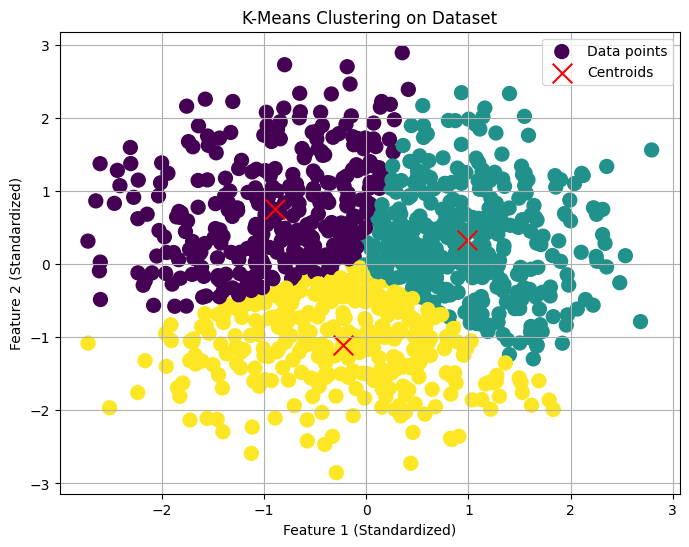

In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Cleaning
# Check for and handle missing values
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
imputer = SimpleImputer(strategy='mean')
df[col] = imputer.fit_transform(df[col])


# Feature Selection
X = df[col].values

# Standardize the dataset
scaler = StandardScaler()  # Changed to StandardScaler
# scaler = MinMaxScaler()  # Changed to StandardScaler
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Get the cluster centers and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Evaluate clustering performance
silhouette_avg = silhouette_score(X_pca, labels)
print("Silhouette Score:", silhouette_avg)

# Visualize the clustered data
plt.figure(figsize=(8, 6))

# Scatter plot of the data points colored by cluster label
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', s=100, label="Data points")

# Plot the centroids on the same plot
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='x', label="Centroids")

# Adding title and labels
plt.title('K-Means Clustering on Dataset')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")


In [43]:
df['gender'].unique()

array(['Male', 'Female', 'Agender', 'Genderqueer', 'Polygender',
       'Genderfluid', 'Non-binary', 'Bigender'], dtype=object)

In [44]:
df['customer_type'].unique()

array(['budget', 'regular', 'premium'], dtype=object)

In [45]:
df['region'].unique()

array(['East', 'West', 'North', 'South'], dtype=object)

In [46]:

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values



In [47]:
df['gender'].unique()

array([5, 2, 0, 4, 7, 3, 6, 1])

In [36]:
df['customer_type'].unique()

array([0, 2, 1])

In [35]:
df['region'].unique()

array([0, 3, 1, 2])

In [34]:
df['freq_of_visit'].max()

100

In [ ]:

# Scaling the dataset
scaler = StandardScaler()  # Consider using StandardScaler as an alternative
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, gmm_labels, 'Gaussian Mixture Model')

# Evaluate clustering performance
score = silhouette_score(X_pca, gmm_labels)
print("Silhouette Score:", score)


Number of clusters (including noise): 3


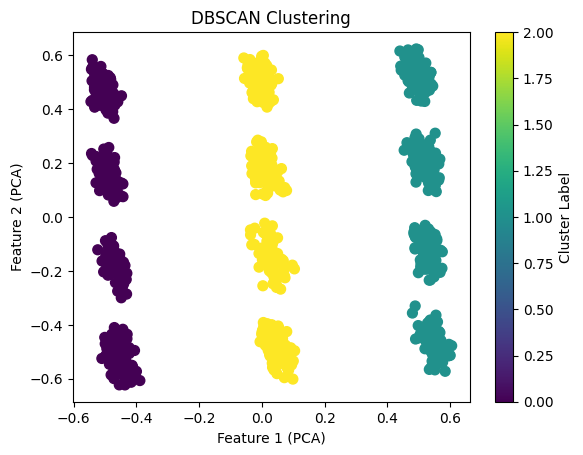

Silhouette Score: 0.3763329390144789


In [18]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Feature selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
# scaler = StandardScaler() # StandardScaler is also an option, depending on the data
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply DBSCAN clustering
# dbscan = DBSCAN(eps=0.3, min_samples=10)
dbscan = DBSCAN(eps=0.2, min_samples=12)
dbscan.fit(X_pca)

# Get the labels assigned by DBSCAN
labels = dbscan.labels_

# Check the number of unique labels (clusters)
unique_labels = set(labels)
print(f"Number of clusters (including noise): {len(unique_labels)}")
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, labels, 'DBSCAN')

# Evaluate clustering performance
score = silhouette_score(X_pca, labels)
print("Silhouette Score:", score)

OPTICS - MinMax

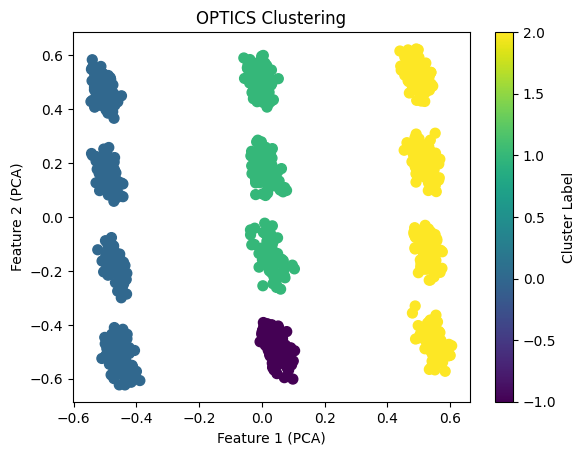

Silhouette Score: 0.32399082209268426


In [45]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = MinMaxScaler() 
# scaler = StandardScaler()  # StandardScaler often works well for distance-based algorithms
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply OPTICS Clustering
optics = OPTICS(min_samples=10, xi=0.02, min_cluster_size=0.25)
optics.fit(X_pca)

# Get the labels assigned by OPTICS
optics_labels = optics.labels_

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, optics_labels, 'OPTICS')

# Evaluate clustering performance
score = silhouette_score(X_pca, optics_labels)
print("Silhouette Score:", score)

OPTICS - Standard Scaling

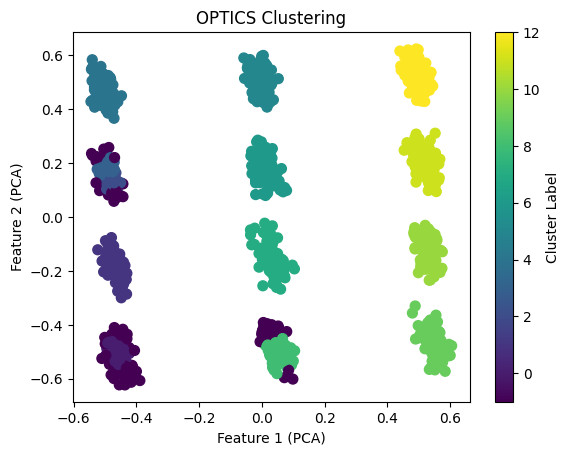

Silhouette Score: 0.5974996811817012


In [51]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Data Preprocessing
# Encode categorical features
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Check and handle missing values if necessary
# Example: df.fillna(df.mean(), inplace=True) # Uncomment if missing values are present

# Feature Selection
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scaling the dataset
scaler = MinMaxScaler()  # StandardScaler often works well for distance-based algorithms
# scaler = StandardScaler()  # StandardScaler often works well for distance-based algorithms
X_scaled = scaler.fit_transform(X)

# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply OPTICS Clustering
# optics = OPTICS(min_samples=10, xi=0.02, min_cluster_size=0.25)
optics = OPTICS(min_samples=20, xi=0.01, min_cluster_size=0.03)
optics.fit(X_pca)

# Get the labels assigned by OPTICS
optics_labels = optics.labels_

# Define function to plot clusters
def plot_clusters(X, labels, algorithm_name):
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.title(f'{algorithm_name} Clustering')
    plt.xlabel('Feature 1 (PCA)')
    plt.ylabel('Feature 2 (PCA)')
    plt.colorbar(label='Cluster Label')
    plt.show()

# Plot the clusters
plot_clusters(X_pca, optics_labels, 'OPTICS')

# Evaluate clustering performance
score = silhouette_score(X_pca, optics_labels)
print("Silhouette Score:", score)

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("MOCK_DATA.csv")

# Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['region'] = le.fit_transform(df['region'])
df['customer_type'] = le.fit_transform(df['customer_type'])

# Select features
col = ['age', 'income', 'purchase_history', 'customer_spending_score', 'freq_of_visit', 'gender', 'region', 'customer_type']
X = df[col].values

# Scale the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Predict the cluster for a new data point
new_data = np.array([[30, 60000, 10, 50, 3, 1, 2, 0]])  # Example new data point
new_data_scaled = scaler.transform(new_data)  # Scale the data
new_data_pca = pca.transform(new_data_scaled)  # Apply PCA

predicted_cluster = kmeans.predict(new_data_pca)  # Predict cluster
print(f"Predicted Cluster: {predicted_cluster}")


Predicted Cluster: [0]
